# EDA Mini Project

## DATA PREPROCESSING

### 1.	Import the necessary libraries and read the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts
import scipy.stats as sta
import sklearn as sl

#### (i) Reading the information

In [2]:
pd.read_csv("fifa_+variable_information.csv")

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag
5,Overall,overall rating
6,Potential,potential rating
7,Club,current club
8,Club Logo,url to club logo
9,Value,current market value


#### (ii) Reading the DataSet

In [3]:
df=pd.read_csv("fifa.csv")
df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### (iii) Getting Information about the Data Set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

### 2. Dropping the columns URL of Photo, Flag and Club Logo is not required in analysis

##### Photo, Flag, Club, Logo as they are URL, Loaned column is dropped as most of the columns have null values
##### And all the values from Crossing to GKReflexes

In [5]:
df1=df.drop(labels=['Photo','Flag','Club Logo','Loaned From'],axis=1)
df1.drop(df1.loc[:,'Crossing':'GKReflexes'],inplace=True,axis=1)
df1.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,€196.4M


### 3. Column	Details	Required output

##### 'Value'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.	Convert to Float after getting rid of currency symbol and suffix. And also converting everything into thousands
##### 'Wage'	 Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. Convert to Float after getting rid of currency symbol and suffix.  And also converting everything into thousands
##### 'Release Clause'	Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. Convert to Float after getting rid of currency symbol and suffix. And also converting everything into thousands

In [6]:
# Creating a function to do above operation
def convert(val):
    if val[-1] == 'M':
        val = float(val[1:-1])*1000000
    elif val[-1] == "K": 
        val = float(val[1:-1])*1000
    else:
        val = float(val[1:])/1000
    return val

In [7]:
# Applying the function to the column using the apply function
df1['Value'] = df1['Value'].apply(convert)
df1['Wage'] = df1['Wage'].apply(convert)
df1['Release Clause'] = df1[df1['Release Clause'].notnull()]['Release Clause'].apply(convert)
df1.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021,5'7,159lbs,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022,6'2,183lbs,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022,5'9,150lbs,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020,6'4,168lbs,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023,5'11,154lbs,196400000.0


##### 'Joined'	Year as a string, in some cases complete date as string	Convert to int with only year
##### 'Contract Valid Until'	Date as a string	Convert to datetime type
##### 'Height'	In inches with a quotation mark 	Convert to Float with decimal points
##### 'Weight'	Contains the suffix lbs 	Remove the suffix and convert to float

In [8]:
# Conversion of column in datetime
df1['Contract Valid Until'] = pd.to_datetime(df1['Contract Valid Until'])
df1.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,4.0,Medium/ Medium,Messi,RF,10.0,"Jul 1, 2004",2021-01-01,5'7,159lbs,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,5.0,High/ Low,C. Ronaldo,ST,7.0,"Jul 10, 2018",2022-01-01,6'2,183lbs,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,5.0,High/ Medium,Neymar,LW,10.0,"Aug 3, 2017",2022-01-01,5'9,150lbs,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,1.0,Medium/ Medium,Lean,GK,1.0,"Jul 1, 2011",2020-01-01,6'4,168lbs,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,4.0,High/ High,Normal,RCM,7.0,"Aug 30, 2015",2023-01-01,5'11,154lbs,196400000.0


In [9]:
# Convert to int with only year
df1['Joined'] = pd.DatetimeIndex(df1['Joined']).year
df1['Joined']=df1[df1['Joined'].notnull()]['Joined'].astype('int')
df1.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,4.0,Medium/ Medium,Messi,RF,10.0,2004.0,2021-01-01,5'7,159lbs,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,5.0,High/ Low,C. Ronaldo,ST,7.0,2018.0,2022-01-01,6'2,183lbs,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,5.0,High/ Medium,Neymar,LW,10.0,2017.0,2022-01-01,5'9,150lbs,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,1.0,Medium/ Medium,Lean,GK,1.0,2011.0,2020-01-01,6'4,168lbs,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,4.0,High/ High,Normal,RCM,7.0,2015.0,2023-01-01,5'11,154lbs,196400000.0


In [10]:
# Function to change height into cm and Converting to Float with decimal points
def change(ht):
    Ht = ht.split("'")
    H_inches = int(Ht[0]) * 12 + float(Ht[1])
    H_cm = 2.54*H_inches
    return H_cm
df1['Height'] = df1[df1['Height'].notnull()]['Height'].apply(change)
df1['Height'] = df1['Height'].fillna((df1['Height'].mean()))
df1.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,4.0,Medium/ Medium,Messi,RF,10.0,2004.0,2021-01-01,170.18,159lbs,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,5.0,High/ Low,C. Ronaldo,ST,7.0,2018.0,2022-01-01,187.96,183lbs,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,5.0,High/ Medium,Neymar,LW,10.0,2017.0,2022-01-01,175.26,150lbs,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,1.0,Medium/ Medium,Lean,GK,1.0,2011.0,2020-01-01,193.04,168lbs,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,4.0,High/ High,Normal,RCM,7.0,2015.0,2023-01-01,180.34,154lbs,196400000.0


In [11]:
# Remove the suffix and convert to float
df1['Weight']=df1.Weight.str.replace('lbs','')
df1['Weight']=df1['Weight'].astype(float)
df1['Weight'] = df1['Weight'].fillna((df1['Weight'].mean()))
df1.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Skill Moves,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,...,4.0,Medium/ Medium,Messi,RF,10.0,2004.0,2021-01-01,170.18,159.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,...,5.0,High/ Low,C. Ronaldo,ST,7.0,2018.0,2022-01-01,187.96,183.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,...,5.0,High/ Medium,Neymar,LW,10.0,2017.0,2022-01-01,175.26,150.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,1.0,Medium/ Medium,Lean,GK,1.0,2011.0,2020-01-01,193.04,168.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,...,4.0,High/ High,Normal,RCM,7.0,2015.0,2023-01-01,180.34,154.0,196400000.0


### 4.	Checking for missing values and do a mean imputation where necessary.

In [12]:
# Checking the missing value in columns for mean imputation
df1.isnull().sum()/len(df1)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      8.529686
Contract Valid Until        1.587302
Height                      0.000000
Weight                      0.000000
Release Clause              8.590103
dtype: float64

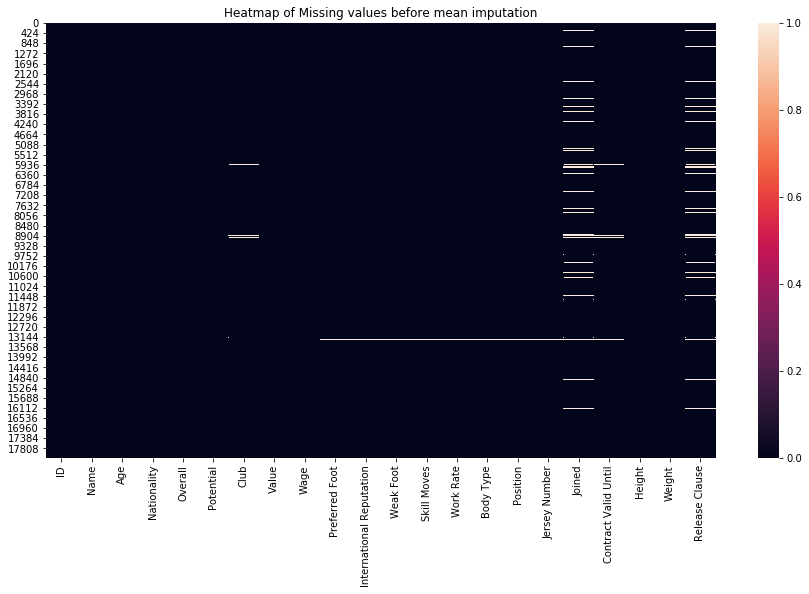

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df1.isna())
plt.title("Heatmap of Missing values before mean imputation")
plt.show()

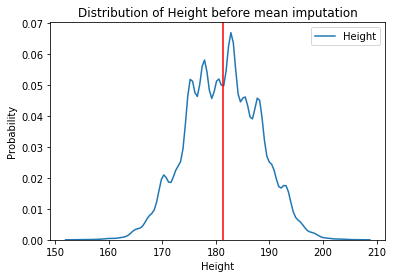

In [14]:
sns.kdeplot(df1['Height'])
plt.axvline(df1['Height'].mean(),color= 'red',label='mean')
plt.title("Distribution of Height before mean imputation")
plt.xlabel('Height')
plt.ylabel('Probability')
plt.show()

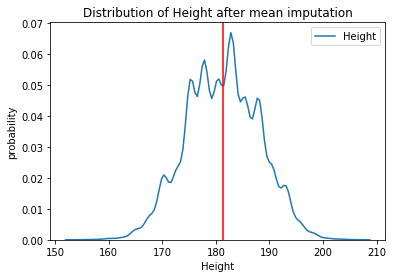

In [15]:
df1['Height'] = df1['Height'].fillna(df1['Height'].mean())
sns.kdeplot(df1['Height'])
plt.axvline(df1['Height'].mean(),color= 'red',label='mean')
plt.title("Distribution of Height after mean imputation")
plt.xlabel('Height')
plt.ylabel('probability')
plt.show()

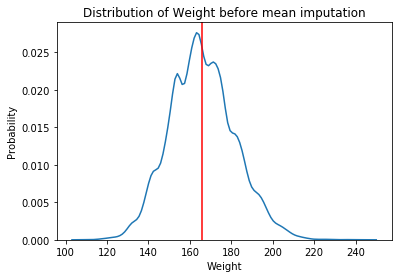

In [16]:
sns.distplot(df1['Weight'],hist= False)
plt.title("Distribution of Weight before mean imputation")
plt.axvline(df1['Weight'].mean(),color= 'red',label='mean')
plt.xlabel('Weight')
plt.ylabel('Probability')
plt.show()

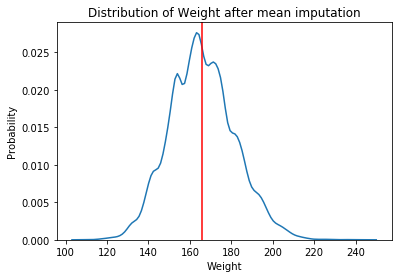

In [17]:
df1['Weight'] = df1['Weight'].fillna(df1['Weight'].mean())
sns.distplot(df1['Weight'],hist= False)
plt.axvline(df1['Weight'].mean(),color= 'red',label='mean')
plt.title("Distribution of Weight after mean imputation")
plt.xlabel('Weight')
plt.ylabel("Probability")
plt.show()

C:\Users\shoun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\shoun\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


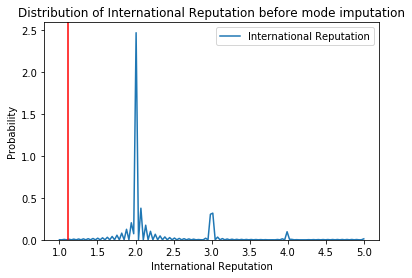

In [18]:
sns.kdeplot(data=df['International Reputation'])
plt.axvline(df1['International Reputation'].mean(),color= 'red',label='mean')
plt.title("Distribution of International Reputation before mode imputation")
plt.xlabel('International Reputation')
plt.ylabel('Probability')
plt.show()

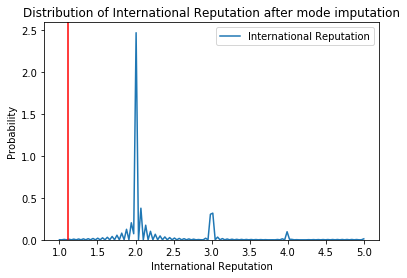

In [19]:
df1['International Reputation'] = df1['International Reputation'].fillna(df1['International Reputation'].mode()[0])
sns.kdeplot(data=df['International Reputation'])
plt.axvline(df1['International Reputation'].mean(),color= 'red',label='mean')
plt.title("Distribution of International Reputation after mode imputation")
plt.xlabel('International Reputation')
plt.ylabel('Probability')
plt.show()

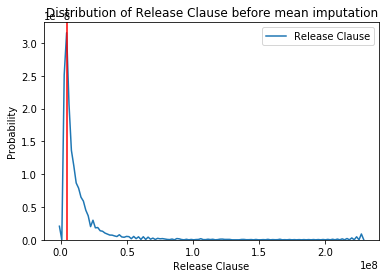

In [20]:
sns.kdeplot(data=df1['Release Clause'])
plt.axvline(df1['Release Clause'].mean(),color= 'red',label='mean')
plt.title("Distribution of Release Clause before mean imputation")
plt.xlabel('Release Clause')
plt.ylabel('Probability')
plt.show()

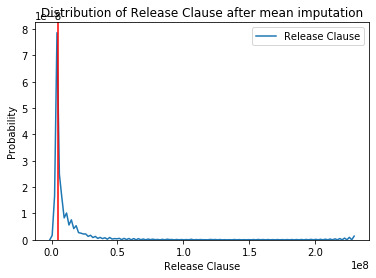

In [21]:
df1['Release Clause'] = df1['Release Clause'].fillna(df1['Release Clause'].mean())
sns.kdeplot(data=df1['Release Clause'])
plt.axvline(df1['Release Clause'].mean(),color= 'red',label='mean')
plt.title("Distribution of Release Clause after mean imputation")
plt.xlabel('Release Clause')
plt.ylabel('Probability')
plt.show()

In [22]:
df1.isnull().sum()/len(df1)*100

ID                          0.000000
Name                        0.000000
Age                         0.000000
Nationality                 0.000000
Overall                     0.000000
Potential                   0.000000
Club                        1.323667
Value                       0.000000
Wage                        0.000000
Preferred Foot              0.263635
International Reputation    0.000000
Weak Foot                   0.263635
Skill Moves                 0.263635
Work Rate                   0.263635
Body Type                   0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      8.529686
Contract Valid Until        1.587302
Height                      0.000000
Weight                      0.000000
Release Clause              0.000000
dtype: float64

## EXPOLATORY ANALYSIS

### 1. Plot the distribution of Overall rating for all players

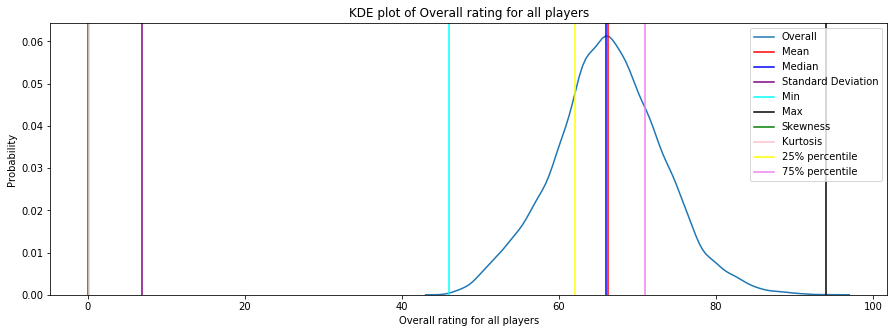

In [23]:
plt.figure(figsize = (15,5))
sns.kdeplot(data=df['Overall'])
plt.title("KDE plot of Overall rating for all players")
plt.axvline(df['Overall'].mean(),color='red',label='Mean')
plt.axvline(df['Overall'].median(),color='blue',label='Median')
plt.axvline(df['Overall'].std(),color='purple',label='Standard Deviation')
plt.axvline(df['Overall'].min(),color='cyan',label='Min')
plt.axvline(df['Overall'].max(),color='black',label='Max')
plt.axvline(df['Overall'].skew(),color='green',label='Skewness')
plt.axvline(df['Overall'].kurt(),color='pink',label='Kurtosis')
plt.axvline(df['Overall'].quantile(0.25),color='yellow',label='25% percentile')
plt.axvline(df['Overall'].quantile(0.75),color='violet',label='75% percentile')
plt.xlabel("Overall rating for all players")
plt.ylabel("Probability")
plt.legend()
plt.show()

### 2. Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

<Figure size 1080x360 with 0 Axes>

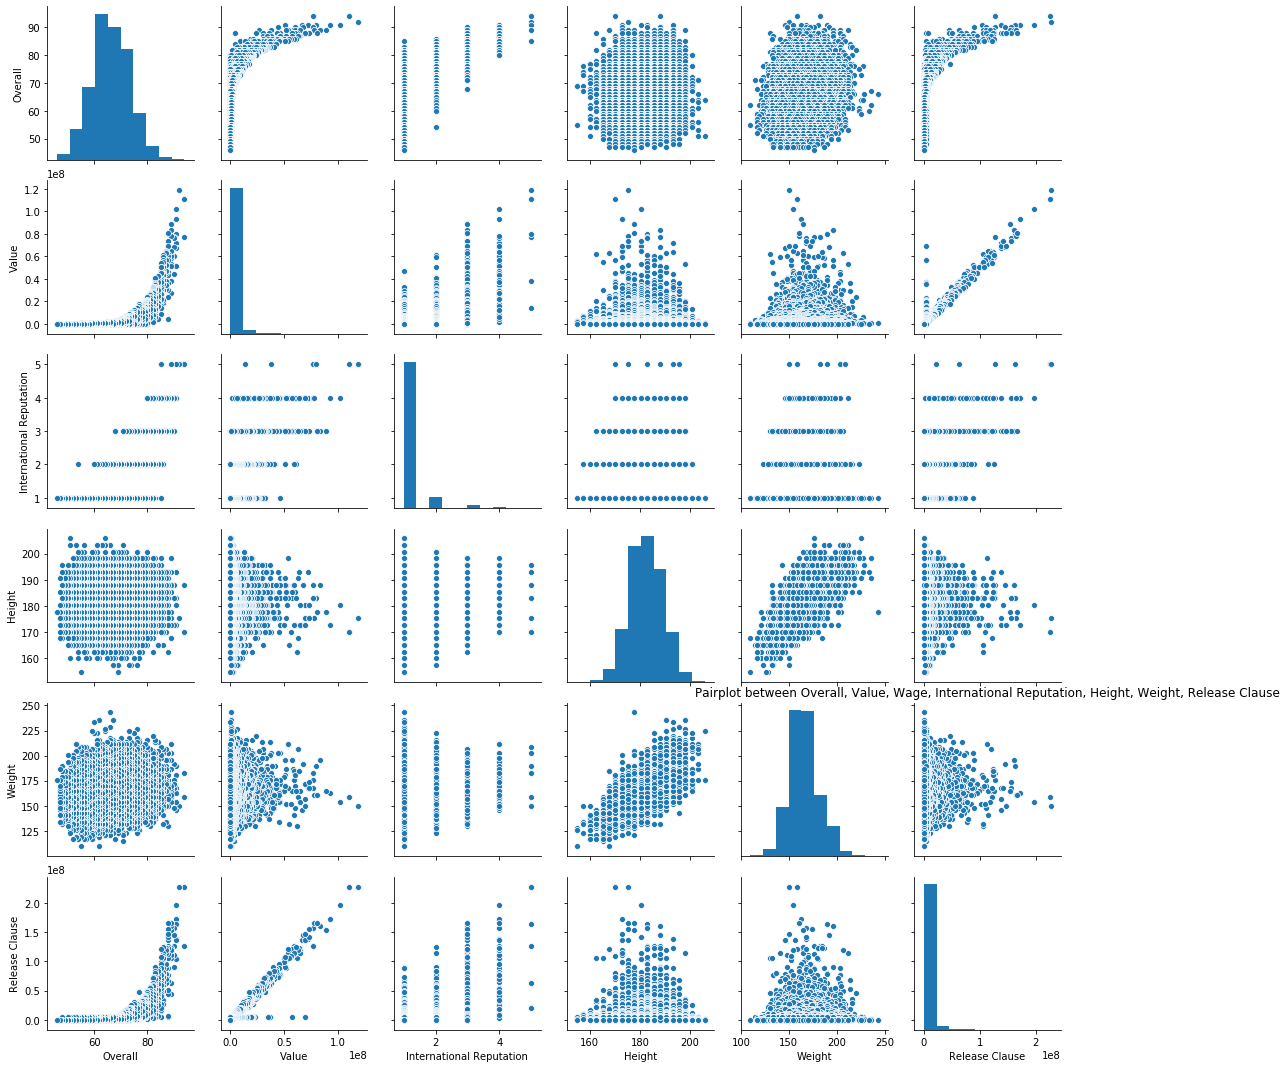

In [24]:
df2=df1[['Overall','Value','International Reputation','Height','Weight','Release Clause']]
plt.figure(figsize = (15,5))
sns.pairplot(data=df2)
plt.title("Pairplot between Overall, Value, Wage, International Reputation, Height, Weight, Release Clause")
plt.show()

### 3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.
#### a)	What would the average wage for this set of players be?
#### b)	What is the average age?
#### c)	Is there a correlation between the Overall rating and Value for these players?

In [25]:
df1['Overall_Score_Rank']=df1['Overall'].rank(method='first',ascending=False)

In [26]:
df3=df1[(df1['Overall_Score_Rank']<21) & (df1['Contract Valid Until'].dt.year==2020)]
df3

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause,Overall_Score_Rank
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,...,Medium/ Medium,Lean,GK,1.0,2011.0,2020-01-01,193.04,168.0,138600000.0,4.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,...,High/ Medium,Normal,LF,10.0,2012.0,2020-01-01,172.72,163.0,172100000.0,6.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,...,High/ High,Lean,RCM,10.0,2012.0,2020-01-01,172.72,146.0,137400000.0,7.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,...,High/ Medium,Normal,RCB,15.0,2005.0,2020-01-01,182.88,181.0,104600000.0,9.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,...,High/ Medium,Normal,LCM,21.0,2010.0,2020-01-01,172.72,148.0,111000000.0,14.0


In [27]:
print(f"Average wage of the player is ${df3['Wage'].mean():0.2f}")
print(f"Average wage of the player is {df3['Age'].mean():0.2f} yrs")
print(f"The correlation between the Overall Rating and Value is given in below table \n{df3[['Overall','Value']].corr()}")

Average wage of the player is $337000.00
Average wage of the player is 30.00 yrs
The correlation between the Overall Rating and Value is given in below table 
          Overall     Value
Overall  1.000000  0.305095
Value    0.305095  1.000000


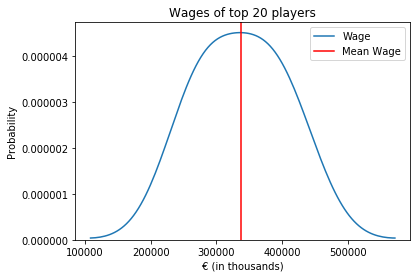

In [28]:
sns.kdeplot(data=df3['Wage'])
plt.title('Wages of top 20 players')
plt.xlabel('€ (in thousands)')
plt.ylabel('Probability')
plt.axvline(df3['Wage'].mean(),color='red',label='Mean Wage')
plt.legend()
plt.show()

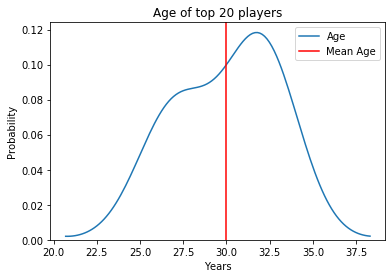

In [29]:
sns.kdeplot(data=df3['Age'])
plt.title('Age of top 20 players')
plt.xlabel('Years')
plt.ylabel('Probability')
plt.axvline(df3['Age'].mean(),color='red',label='Mean Age')
plt.legend()
plt.show()

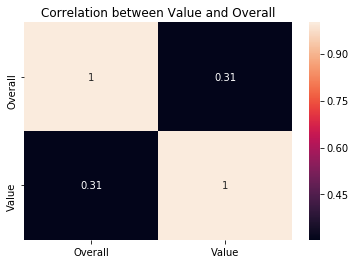

In [30]:
sns.heatmap(data=df3[['Overall','Value']].corr(),annot=True)
plt.title('Correlation between Value and Overall')
plt.show()

### 4.	Generate tables containing the top 5 players by Overall rating for each unique position.
#### a)	Are there any players appearing in more than one Table . Please point out such players.
#### b)	What is the average wage one can expect to pay for the top 5 in every position?

In [31]:
df1['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [32]:
df4=df1.groupby('Position',group_keys=False)
df5=df4.apply(lambda x:x.sort_values('Overall',ascending=False).head(5))
df5

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Work Rate,Body Type,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight,Release Clause,Overall_Score_Rank
17,194765,A. Griezmann,27,France,89,90,Atlético Madrid,78000000.0,145000.0,Left,...,High/ High,Lean,CAM,7.0,2014.0,2023-01-01,175.26,161.0,1.658000e+08,18.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,...,High/ Medium,Lean,CAM,10.0,2013.0,2020-01-01,180.34,168.0,1.415000e+08,32.0
61,201942,Roberto Firmino,26,Brazil,86,87,Liverpool,53000000.0,195000.0,Right,...,High/ High,Lean,CAM,9.0,2015.0,2023-01-01,180.34,168.0,1.047000e+08,62.0
66,189596,T. Müller,28,Germany,86,86,FC Bayern München,45000000.0,135000.0,Right,...,High/ High,Lean,CAM,13.0,2008.0,2021-01-01,185.42,165.0,7.430000e+07,67.0
74,176635,M. Özil,29,Germany,86,86,Arsenal,43500000.0,190000.0,Left,...,Medium/ Low,Lean,CAM,10.0,2013.0,2021-01-01,180.34,168.0,8.270000e+07,75.0
12,182493,D. Godín,32,Uruguay,90,90,Atlético Madrid,44000000.0,125000.0,Right,...,Medium/ High,Lean,CB,10.0,2010.0,2019-01-01,187.96,172.0,9.020000e+07,13.0
42,205600,S. Umtiti,24,France,87,92,FC Barcelona,57000000.0,205000.0,Left,...,Medium/ High,Normal,CB,23.0,2016.0,2023-01-01,182.88,165.0,1.211000e+08,43.0
73,177509,M. Benatia,31,Morocco,86,86,Juventus,30000000.0,160000.0,Right,...,Medium/ High,Normal,CB,4.0,2014.0,2020-01-01,187.96,207.0,4.950000e+07,74.0
89,192366,N. Otamendi,30,Argentina,85,85,Manchester City,28500000.0,170000.0,Right,...,High/ High,Normal,CB,30.0,2015.0,2022-01-01,182.88,179.0,5.270000e+07,90.0
102,171919,Naldo,35,Brazil,85,85,FC Schalke 04,9000000.0,38000.0,Right,...,Medium/ Medium,Lean,CB,29.0,2016.0,2020-01-01,198.12,201.0,1.530000e+07,103.0


In [33]:
df6=df1['Name'].value_counts()
df6[df6>1]

J. Rodríguez       11
Paulinho            8
R. Williams         7
J. Williams         7
Felipe              6
J. Gómez            6
J. Hernández        6
J. Valencia         6
L. Rodríguez        5
D. Williams         5
Danilo              5
J. Torres           5
L. López            5
M. Pedersen         5
M. Smith            5
J. Murillo          5
J. Jones            5
J. Martínez         5
J. Pérez            5
M. Gómez            5
A. Traoré           5
M. López            4
F. Rodríguez        4
J. Brown            4
A. Ba               4
J. Clarke           4
M. García           4
D. Johnson          4
R. González         4
J. Medina           4
                   ..
P. Herrmann         2
S. Abdullahi        2
C. Johnson          2
G. Karlen           2
S. Kelly            2
T. Miller           2
Bruno               2
G. Barry            2
P. Jones            2
H. Smith            2
A. Costa            2
Clemente            2
J. Thomassen        2
P. Da Silva         2
S. Gustafs

In [34]:
df_wage=pd.pivot_table(data=df5,values='Wage',index='Position',aggfunc='mean')
df_wage

,Wage
Position,
CAM,174000.0
CB,139600.0
CDM,217000.0
CF,47400.0
CM,130600.0
GK,192800.0
LAM,81600.0
LB,177200.0
LCB,162000.0


<Figure size 1080x576 with 0 Axes>

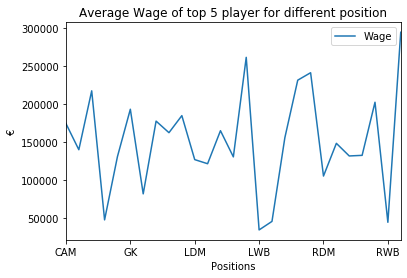

In [35]:
plt.figure(figsize=(15,8))
df_wage.plot()
plt.title("Average Wage of top 5 player for different position")
plt.xlabel("Positions")
plt.ylabel("€")
plt.show()